In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Upload the dataset file if you haven't already
from google.colab import files
uploaded = files.upload()

# Load the dataset (replace 'Advertising.csv' with your uploaded file name)
data = pd.read_csv("advertising.csv")

# Display the first few rows of the dataset
print(data.head())

# Check the dataset info
print(data.info())

Saving advertising.csv to advertising.csv
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [4]:
# Selecting feature (e.g., TV advertising budget) and target variable (Sales)
X = data[['TV']]  # Predictor variable
y = data['Sales']  # Target variable

# Display feature and target variable samples
print("Feature sample (X):\n", X.head())
print("\nTarget sample (y):\n", y.head())

Feature sample (X):
       TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8

Target sample (y):
 0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [5]:
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training feature shape: (160, 1)
Testing feature shape: (40, 1)
Training target shape: (160,)
Testing target shape: (40,)


In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:")
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Model Coefficients:
Slope (Coefficient): 0.0554829439314632
Intercept: 7.007108428241848


In [7]:
# Predicting target variable for the test data
y_pred = model.predict(X_test)

# Display a sample of predictions
print("Predicted values (y_pred):\n", y_pred[:5])
print("\nActual values (y_test):\n", y_test[:5].values)

Predicted values (y_pred):
 [16.06747317 17.84847567 23.25806271  7.65625887 19.23000098]

Actual values (y_test):
 [16.9 22.4 21.4  7.3 24.7]


In [8]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Model Evaluation Metrics:
Mean Squared Error (MSE): 6.101072906773963
R-squared (R²): 0.802561303423698


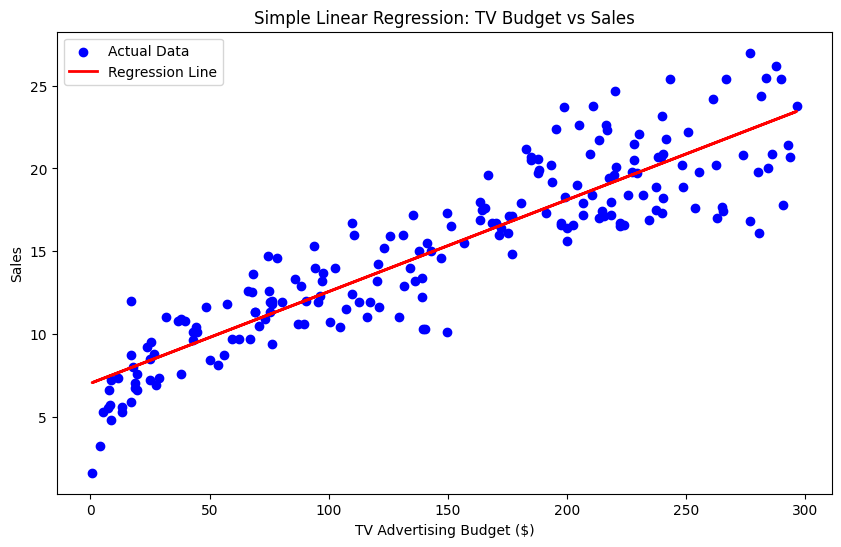

In [9]:
# Plotting the regression line on the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression: TV Budget vs Sales")
plt.xlabel("TV Advertising Budget ($)")
plt.ylabel("Sales")
plt.legend()
plt.show()

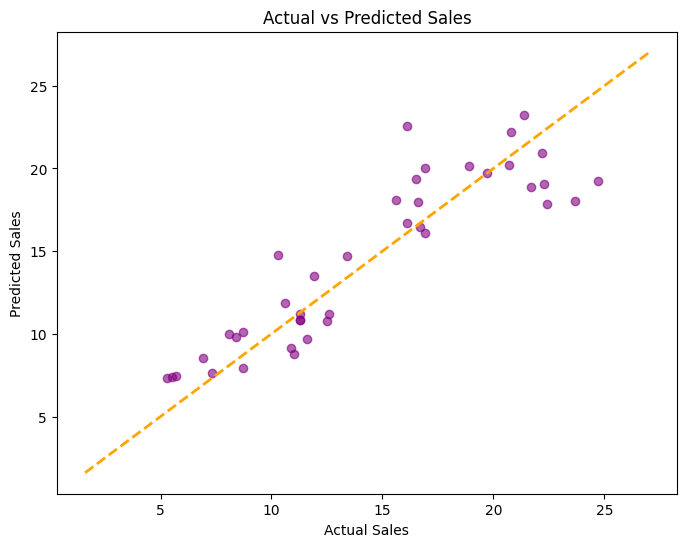

In [10]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="purple", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="orange", linewidth=2, linestyle="--")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()